In [116]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from trapezoidalMatrixFree import trapezoidalMatrixFree
from trapezoidal import rk_integrator

%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
        
        
def plot_results(x, L_list, tlist):
    n_t = x[:,2:]
    plt.pcolormesh(tlist, L_list, n_t.T, shading='nearest')
    # plt.contourf(tlist, L_list, n_t.T)
    plt.ylabel('L (particle size)')
    plt.xlabel('time')
    plt.colorbar()
    plt.show()

    # plt.plot(tlist, x[:,0]) 
    # plt.title('supersaturation')
    # plt.xlabel('t')
    # plt.show()

    # plt.plot(tlist, x[:,1]) 
    # plt.title('volume')
    # plt.xlabel('t')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### At very small dt/dL, WENO and np.gradient are equivalent

  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 0/501 [00:00<?, ?it/s]

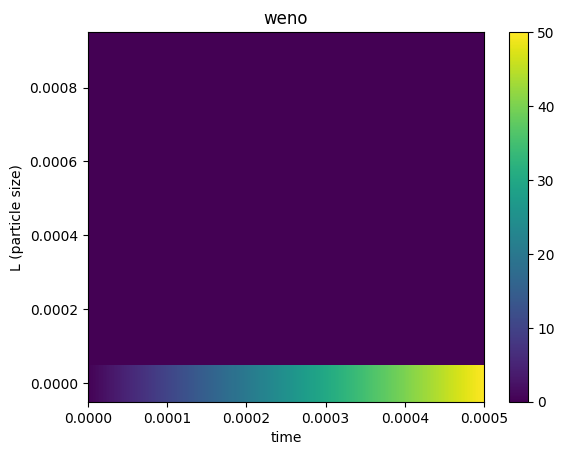

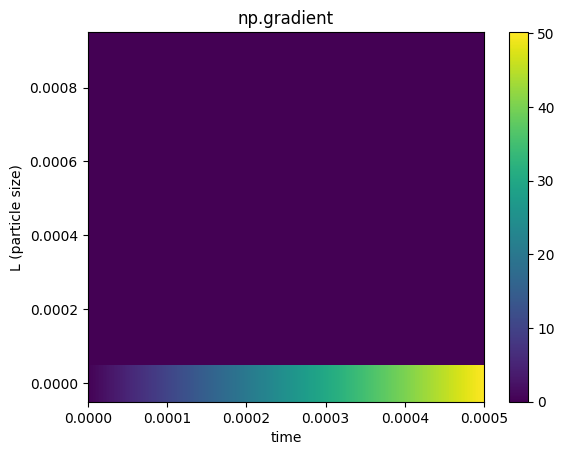

In [255]:
dL = 1e-4
dt = 1e-2*dL

L_list = np.arange(0,10*dL, dL)
tlist = np.arange(0,500*dt,dt)


S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution
x0 = np.hstack([S0, V0, n0])
# target parameters we will try to recover
p = {
    'L_list' : L_list,
    'E' :  1e-6, #evaporation rate
    'rho' : 1200, # density of the crystal
    'k_v' : 1, #goes in N_C, volumetric shape factor
    'k_g' : 1e-3, #growth rate constant m/s
    'g' : 1, #power constant for growth
    'k_N' : 1e5, #nucleation rate constant 
    'alpha' :2, #power constant for nucleation
    'weno': True,  # use weno or not for differentiation w.r.t. L
    'order' : 'np' # string. set to integer for FinDiff, set to 'np' for np.gradient. IF NOT WENO.
     }

x_t_weno = rk_integrator(x0, tlist, p)
p['weno'] = False
p['order'] = 'np'
x_t_np = rk_integrator(x0, tlist, p)
plt.title('weno')
plot_results(x_t_weno, L_list, tlist)
plt.title('np.gradient')
plot_results(x_t_np, L_list, tlist)


### As dt/dL increases, the two should diverge

But what we see below is that the divergence just depends on the total time, not on dt/dL. In the following three cells, the total simulation time is kept constant and dt/dL is increased. The difference between WENO and np.gradient appears constant

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

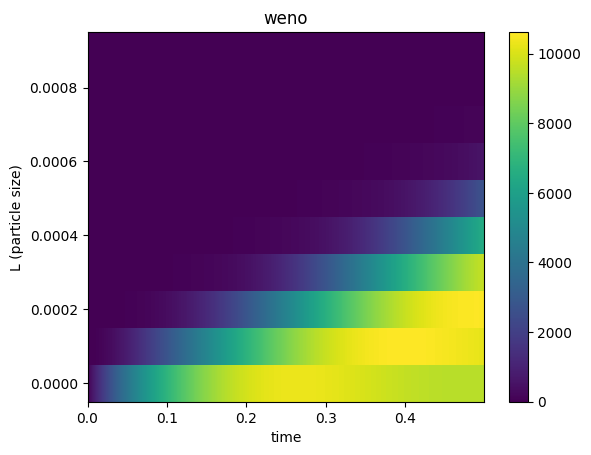

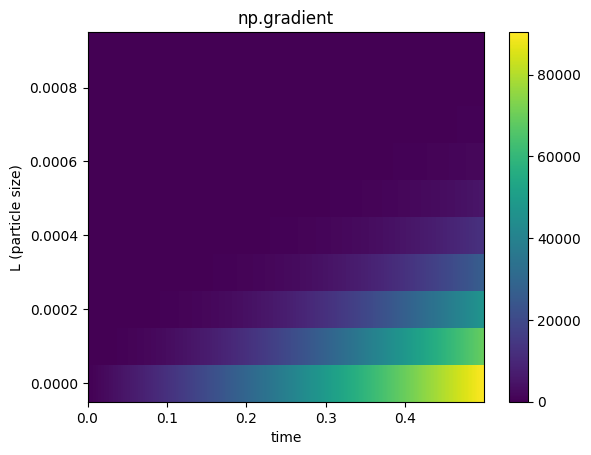

In [253]:
dL = 1e-4
dt = 5e-2*dL

L_list = np.arange(0,10*dL, dL)
tlist = np.arange(0,100000*dt,dt)


p['L_list'] = L_list
p['weno']  = True
x_t_weno = rk_integrator(x0, tlist, p)
p['weno'] = False
p['order'] = 'np'
x_t_np = rk_integrator(x0, tlist, p)
plt.title('weno')
plot_results(x_t_weno, L_list, tlist)
plt.title('np.gradient')
plot_results(x_t_np, L_list, tlist)

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

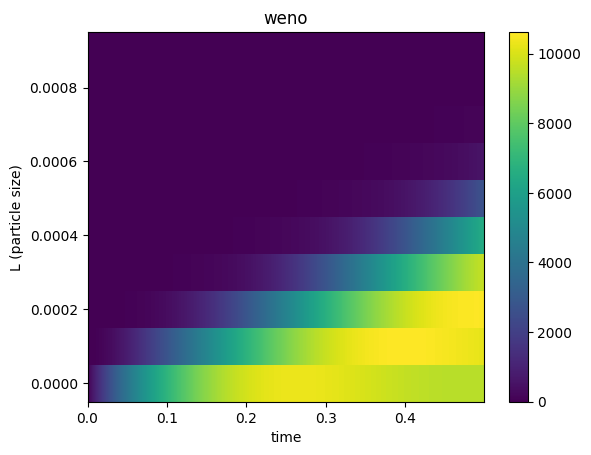

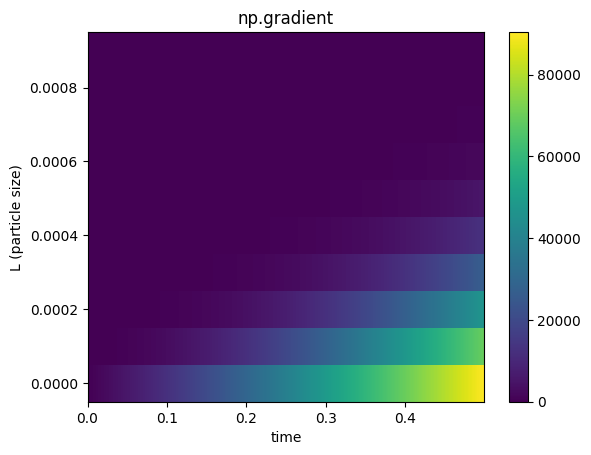

In [249]:
dL = 1e-4
dt = 1e-1*dL

L_list = np.arange(0,10*dL, dL)
tlist = np.arange(0,50000*dt,dt)


p['L_list'] = L_list
p['weno']  = True
x_t_weno = rk_integrator(x0, tlist, p)
p['weno'] = False
p['order'] = 'np'
x_t_np = rk_integrator(x0, tlist, p)
plt.title('weno')
plot_results(x_t_weno, L_list, tlist)
plt.title('np.gradient')
plot_results(x_t_np, L_list, tlist)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

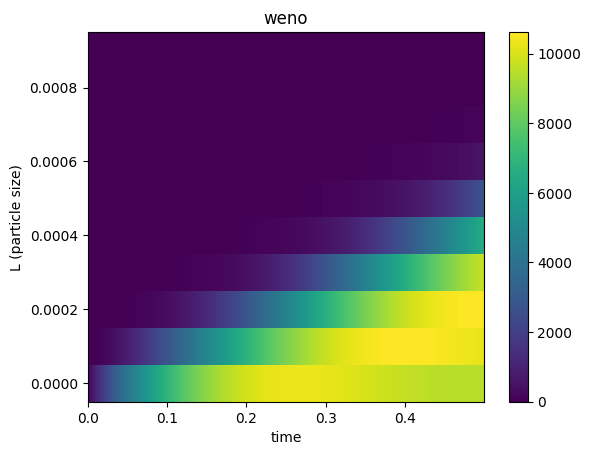

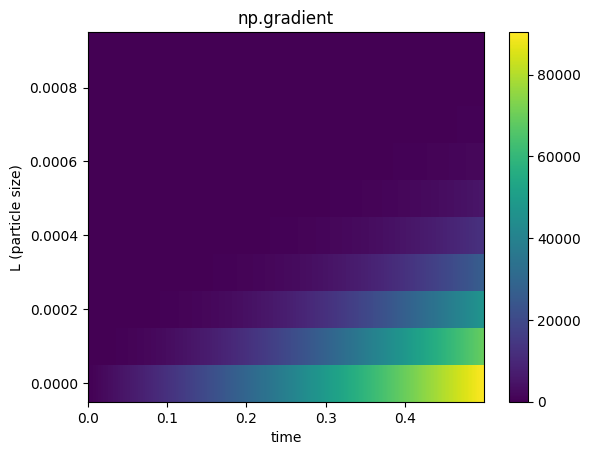

In [251]:
dL = 1e-4
dt = 1e0*dL

L_list = np.arange(0,10*dL, dL)
tlist = np.arange(0,5000*dt,dt)


p['L_list'] = L_list
p['weno']  = True
x_t_weno = rk_integrator(x0, tlist, p)
p['weno'] = False
p['order'] = 'np'
x_t_np = rk_integrator(x0, tlist, p)
plt.title('weno')
plot_results(x_t_weno, L_list, tlist)
plt.title('np.gradient')
plot_results(x_t_np, L_list, tlist)
